<a href="https://colab.research.google.com/github/Imthiyas1989/Bank-Transaction-Dataset-for-Fraud-Detection/blob/main/ML_Capstone_Project_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv"
df = pd.read_csv(url)

# Few rows of the dataset
print(df.head())

# Information about the dataset
print(df.info())

  Transaction_ID         Card_Type Merchant_Category  Transaction_Amount  \
0       W963UK57        Mastercard      Utility bill             27214.0   
1       V606KV56  American Express            Retail             83956.0   
2       R531NU70              Visa    Transportation            193280.0   
3       T783GF79             RuPay   Online Shopping            167381.0   
4       K256ZN73             RuPay            Retail             81170.0   

  Transaction_DateTime Location Region  Cardholder_Age Cardholder_Gender  \
0  2020-01-01 09:43:17    Patna   East            23.0            Female   
1  2020-01-03 16:26:13    Surat   West            49.0              Male   
2  2020-01-04 03:40:49    Patna   East             NaN              Male   
3  2020-01-04 14:56:24    Surat   West            52.0            Female   
4  2020-01-04 17:26:47  Lucknow  North            37.0            Female   

   Cardholder_Monthly_Income  Cardholder_Average_Spend  Credit_Limit  \
0             

#1) Exploratory Data Analysis (EDA):

Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64


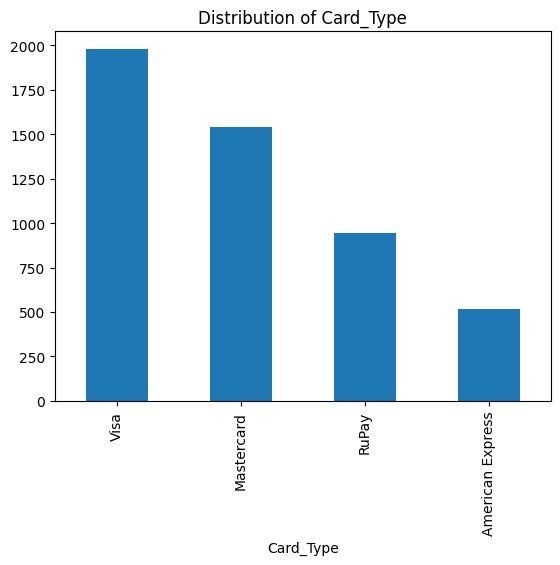

Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64


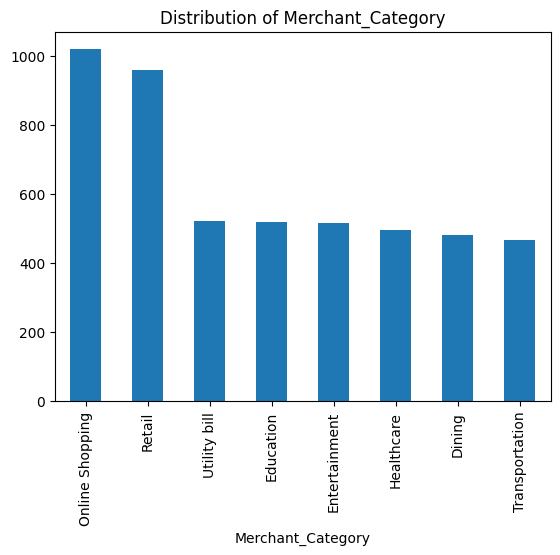

Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64


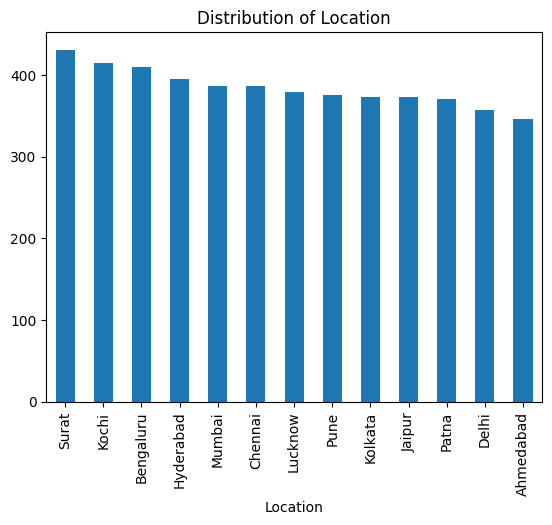

       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend  
count               4792.000000  
mean               63058.343566  
std                40056.989704  
min                10282.410000  
25%                33336.742500  
50%                49547.945000  
75%                83732.352500  
max               199898.290000  


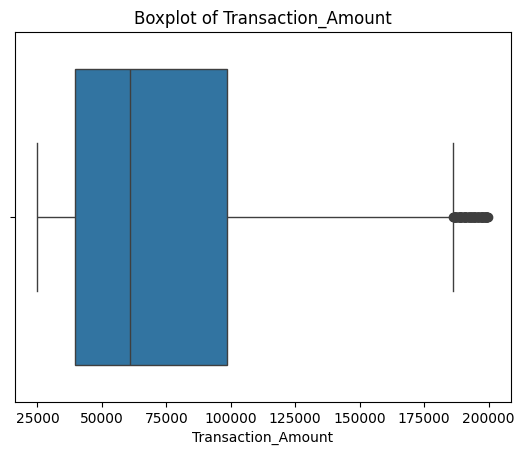

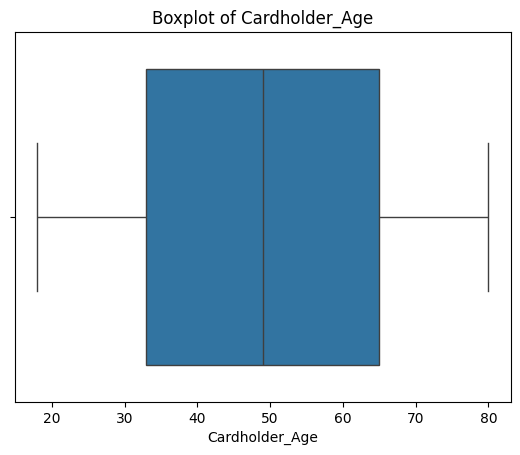

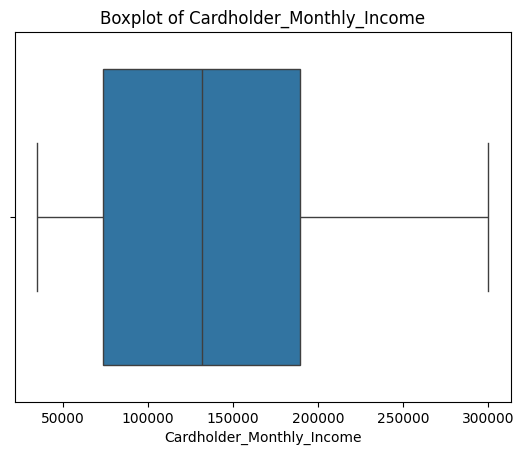

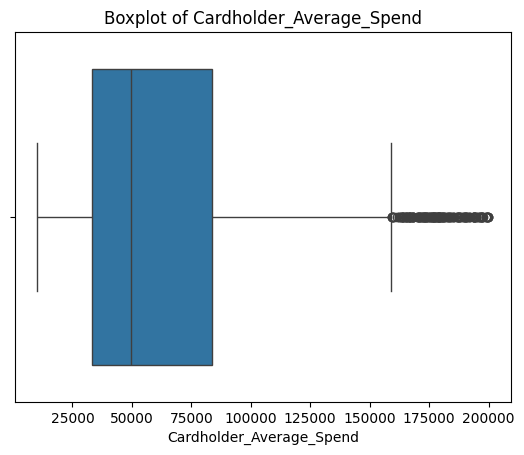

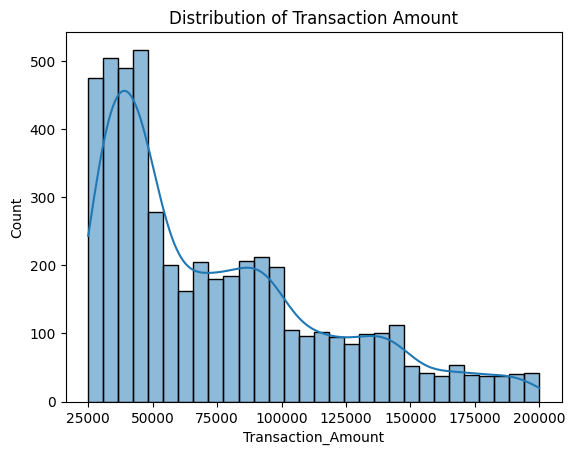

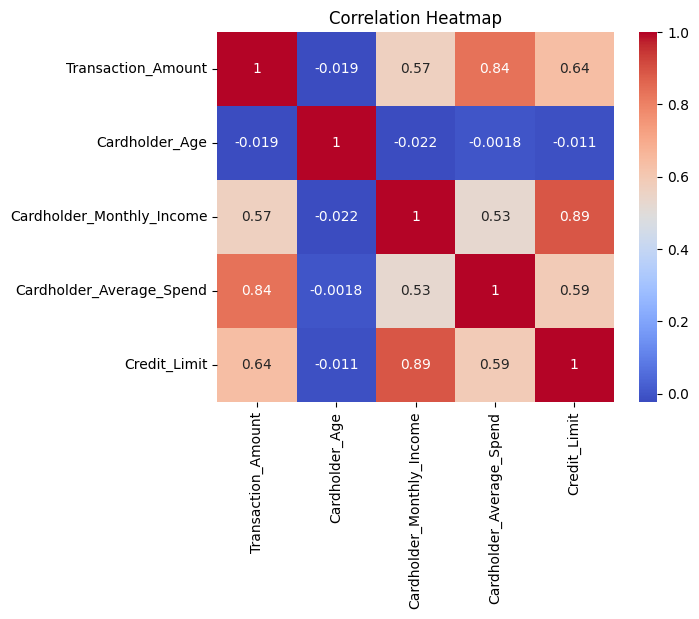

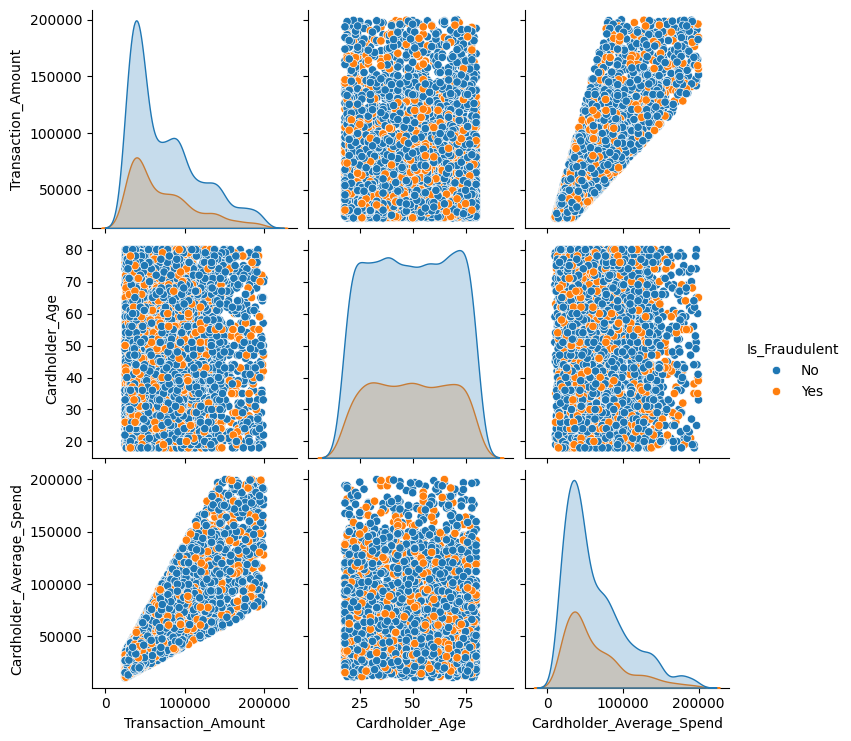

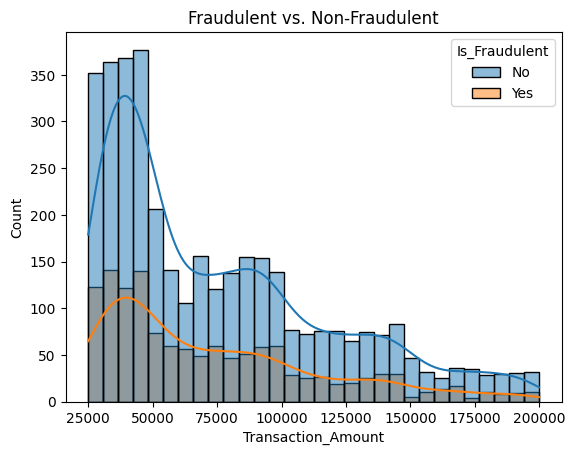

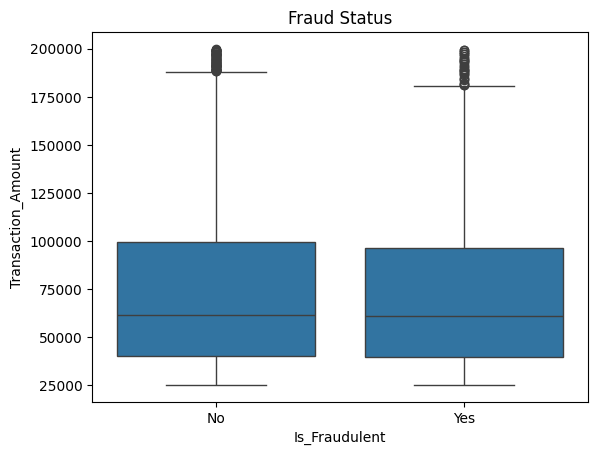

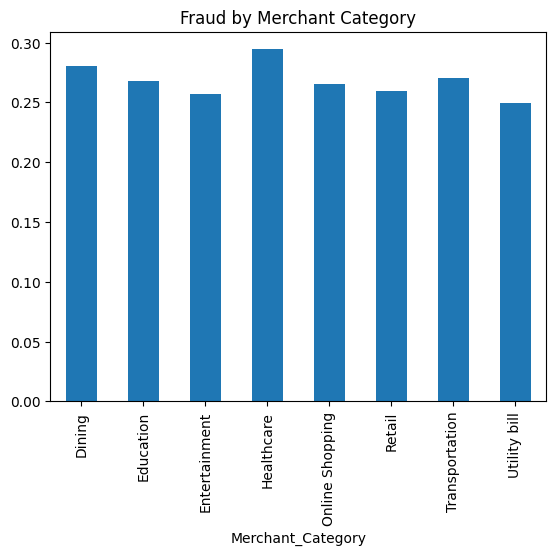

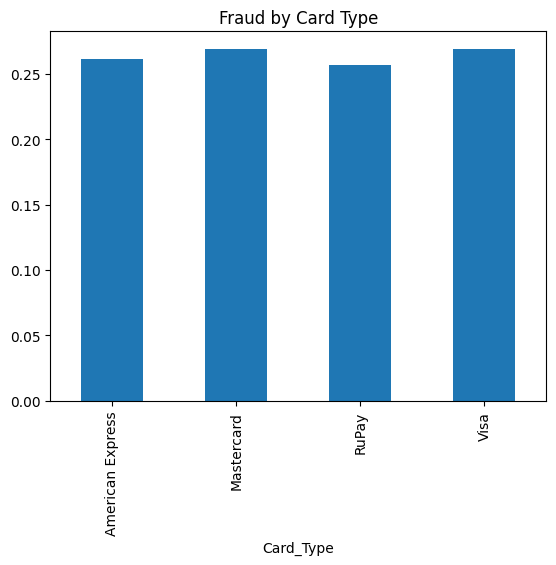

In [ ]:
# Distribution of categorical features
categorical_features = ['Card_Type', 'Merchant_Category', 'Location']
for feature in categorical_features:
    print(df[feature].value_counts())
    df[feature].value_counts().plot(kind='bar', title=f'Distribution of {feature}')
    plt.show()

# Statistics for numerical features
numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
print(df[numerical_features].describe())

# Box plot for outliers
for feature in numerical_features:
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Histogram for Transaction_Amount
sns.histplot(df['Transaction_Amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amount')
plt.show()

# Correlation
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot to view relationships
sns.pairplot(df, hue='Is_Fraudulent', vars=['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Average_Spend'])
plt.show()

# Transaction amounts by fraud status
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', kde=True, bins=30)
plt.title('Fraudulent vs. Non-Fraudulent')
plt.show()

# Boxplot of transaction amounts
sns.boxplot(data=df, x='Is_Fraudulent', y='Transaction_Amount')
plt.title('Fraud Status')
plt.show()

# Fraud by merchant category
df['Is_Fraudulent'] = df['Is_Fraudulent'].map({'Yes': 1, 'No': 0})
fraud_by_merchant = df.groupby('Merchant_Category')['Is_Fraudulent'].mean()
fraud_by_merchant.plot(kind='bar', title='Fraud by Merchant Category')
plt.show()

# Fraud by card type
fraud_by_card = df.groupby('Card_Type')['Is_Fraudulent'].mean()
fraud_by_card.plot(kind='bar', title='Fraud by Card Type')
plt.show()


#2) Data Preprocessing - Data Cleaning:

In [ ]:
# Median is used for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Mode is used for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verifying missing values
print(df.isnull().sum())

# IQR for outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Outliers in numerical features
for column in numerical_features:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers detected in {column}: {len(outliers)}")

from scipy.stats import skew

# Skewness for numerical features
for column in numerical_features:
    skewness = skew(df[column].dropna())
    print(f"Skewness of {column}: {skewness}")

# Applying log transformation to improve their distribution
if abs(skewness) > 1 and column != 'Is_Fraudulent':
    print(f"Applying log transformation to {column}")
    df[column] = np.log1p(df[column])

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64
Outliers detected in Transaction_Amount: 97
Outliers detected in Cardholder_Age: 0
Outliers detected in Cardholder_Monthly_Income: 0
Outliers detected in Cardholder_Average_Spend: 173
Outliers detected in Credit_Limit: 0
Outliers detected in Is_Fraudulent: 0
Skewness of Transaction_Amount: 0.9697037051960788
Skewness of Cardholder_Age: -0.00867007660122079
Skewness of Cardholder_Monthly_Income: 0.45751138197739255
Skewness of Cardholder_Average_Spend: 1.2123694627463026
Skewness of Credit_Limit: 0.012209577409351934


<ipython-input-71-f36f39b79e1a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#3) Feature Engineering:

In [ ]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Transformed dataset
print(df_encoded.head())

from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

# Transformed dataset
print("After label encoding:")
print(df.head())

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week'],
      dtype='object')
   Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
0             27214.0            23.0                    94632.0   
1             83956.0            49.0                   148118.0   
2            193280.0            49.0                   210921.0   
3            167381.0            52.0                   148070.0   
4             81170.0            37.0                   174470.0   

   Cardholder_Average_Spend  Credit_Limit  Is_Fraudulent  \
0                  36369.65      100000.0              0   
1                  89179.12      150000.0              0   
2                 106668.60      200000.0              0   
3                 173155.52      200000.0              1   
4                  52713.09      200000.0              0   

   Transaction_ID_A106IL41  Transacti

#4) Feature Selection:

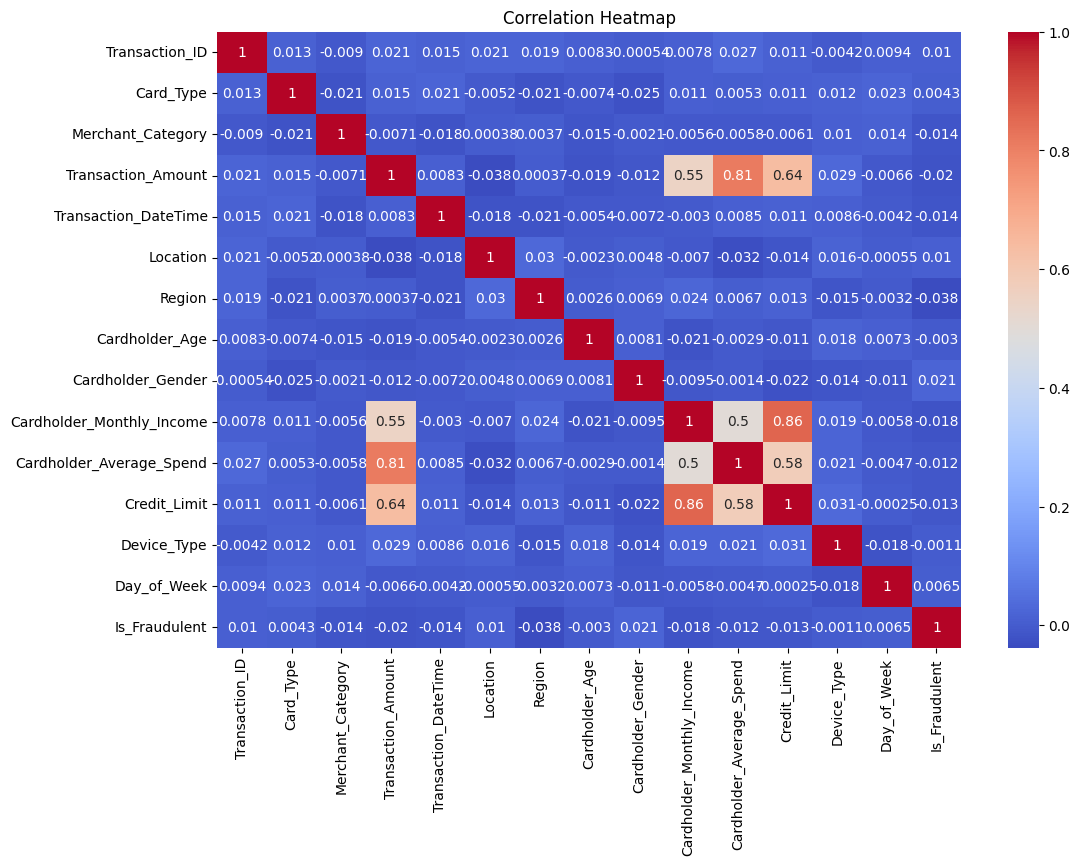

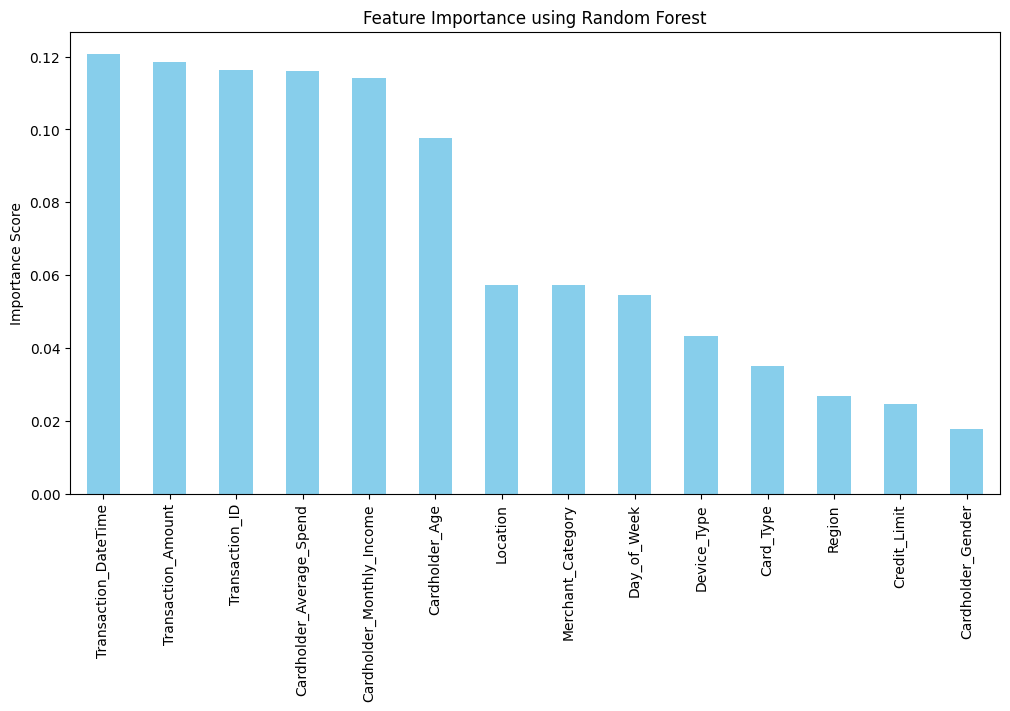

Top Features: Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')
Reduced Features: Index(['Merchant_Category', 'Transaction_Amount', 'Transaction_DateTime',
       'Location', 'Region', 'Cardholder_Age', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Correlation on numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature importance with Random Forest
X = df.drop(columns=["Is_Fraudulent"])
y = df["Is_Fraudulent"]

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Ploting feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), color="skyblue")
plt.title("Feature Importance using Random Forest")
plt.ylabel("Importance Score")
plt.show()

# Chi-Square Test on categorical features
categorical_features = df.select_dtypes(include=["uint8", "int"]).columns
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(df[categorical_features], y)

# Top features
selected_features = chi2_selector.get_support(indices=True)
print("Top Features:", categorical_features[selected_features])

# Identify and remove redundant or irrelevant features
df_reduced = df.drop(columns=["Transaction_ID", "Card_Type"])
print("Reduced Features:", df_reduced.columns)

#5) Split data into training and testing:

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["Is_Fraudulent"])
y = df["Is_Fraudulent"]

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verifying distribution
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

# Shape of the datasets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Is_Fraudulent
0    0.7336
1    0.2664
Name: proportion, dtype: float64
Is_Fraudulent
0    0.7335
1    0.2665
Name: proportion, dtype: float64
Is_Fraudulent
0    0.734
1    0.266
Name: proportion, dtype: float64

Shape of X_train: (4000, 14)
Shape of X_test: (1000, 14)
Shape of y_train: (4000,)
Shape of y_test: (1000,)


#6) Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Finding numerical columns
numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns

# Scaling numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Common scaling techniques include Min-Max scaling or Standardization

scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Checking scaled data
print(X_train[numerical_features].head())
print(X_test[numerical_features].head())

      Transaction_ID  Card_Type  Merchant_Category  Transaction_Amount  \
4165        0.323865   1.000000           0.714286            0.789810   
4945        0.549310   1.000000           1.000000            0.114337   
130         0.131826   0.666667           0.142857            0.065577   
3641        0.077816   1.000000           0.285714            0.084090   
1964        0.304261   0.333333           0.714286            0.639703   

      Transaction_DateTime  Location    Region  Cardholder_Age  \
4165              0.833167  0.416667  0.333333        0.822581   
4945              0.989198  1.000000  1.000000        0.532258   
130               0.026005  0.000000  1.000000        0.177419   
3641              0.728346  0.000000  1.000000        0.032258   
1964              0.392879  0.833333  0.000000        0.870968   

      Cardholder_Gender  Cardholder_Monthly_Income  Cardholder_Average_Spend  \
4165                1.0                   0.655787                  0.708777  

#7) Build the Machine Learning Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

model_performance = {}

# Train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_performance[name] = {"Accuracy": accuracy, "F1 Score": f1}

# Result
print("Model Performance:")
print("-" * 18)
for model, metrics in model_performance.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.4f}, F1 Score = {metrics['F1 Score']:.4f}")

# Model based on F1-score
best_model_name = max(model_performance, key=lambda x: model_performance[x]["F1 Score"])
best_model = classifiers[best_model_name]

print(f"\nBest Model: {best_model_name}")

# Best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Performance:
------------------
Logistic Regression: Accuracy = 0.7340, F1 Score = 0.0000
Naive Bayes: Accuracy = 0.7340, F1 Score = 0.0000
Decision Tree: Accuracy = 0.5710, F1 Score = 0.2380
Random Forest: Accuracy = 0.7330, F1 Score = 0.0000
K-Nearest Neighbors: Accuracy = 0.6700, F1 Score = 0.1538
Support Vector Machine: Accuracy = 0.7340, F1 Score = 0.0000

Best Model: Decision Tree
[[504 230]
 [199  67]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       734
           1       0.23      0.25      0.24       266

    accuracy                           0.57      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.59      0.57      0.58      1000

